In [1]:
%pip install seaborn
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
car_sales = pd.read_csv('data/car-sales.csv/car-sale.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/car-sales.csv'

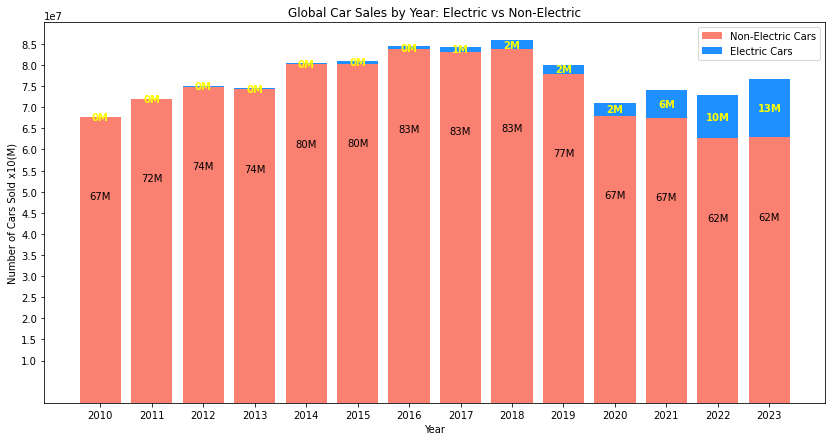

In [49]:
world_data = car_sales[car_sales['Entity'] == 'World']


# Setting the figure size
plt.figure(figsize=(14, 7))

# Plotting the stacked bar plot
plt.bar(world_data['Year'], world_data['Non-electric car sales'], label='Non-Electric Cars', color='salmon')
plt.bar(world_data['Year'], world_data['Electric cars sold'], bottom=world_data['Non-electric car sales'], label='Electric Cars', color='dodgerblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold x10(M)')
plt.title('Global Car Sales by Year: Electric vs Non-Electric')
plt.legend()

for index, row in world_data.iterrows():
    # Non-electric cars
    plt.text(row['Year'], row['Non-electric car sales'] - 20000000, f'{int(row["Non-electric car sales"]/1000000)}M', ha='center', va='bottom', color='black')
    # Electric cars
    plt.text(row['Year'], row['Non-electric car sales'] + row['Electric cars sold'] / 2, f'{int(row["Electric cars sold"]//1000000)}M', ha='center', va='center', color='yellow', fontweight='bold')
    # Total title
plt.xticks(range(2010, 2024))
plt.yticks(range(10000000, 90000000, 5000000))
# Displaying the plot
plt.show()

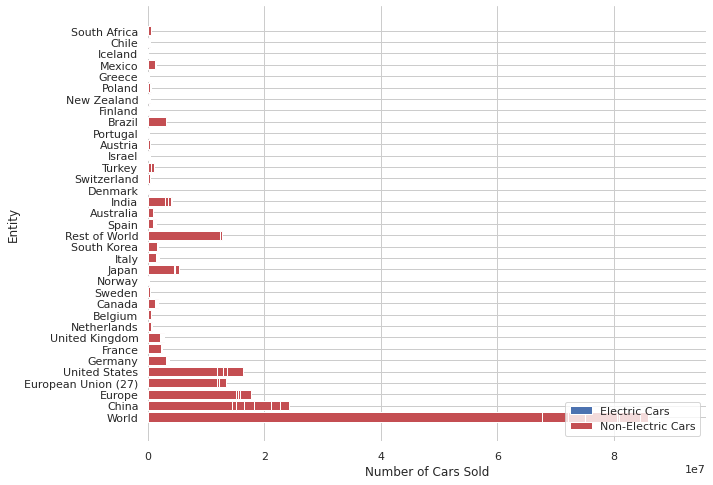

In [75]:

# Load the car-sales dataset using pandas
car_type_sales = pd.read_csv("data/car-sales.csv").sort_values("Electric cars sold", ascending=False)

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot the total cars sold as horizontal bars
# Plot the electric cars sales
ax.barh(car_type_sales['Entity'], car_type_sales['Electric cars sold'], label='Electric Cars', color='b')

# Plot the non-electric cars sales on top of the electric cars sales
ax.barh(car_type_sales['Entity'], car_type_sales['Non-electric car sales'], left=car_type_sales['Electric cars sold'], label='Non-Electric Cars', color='r')

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, car_type_sales[['Electric cars sold', 'Non-electric car sales']].sum(axis=1).max() + 10000), ylabel="Countries",
       xlabel="Number of Cars Sold")
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()


In [50]:
car_in_use = pd.read_csv("data/electric-car-in-use.csv")

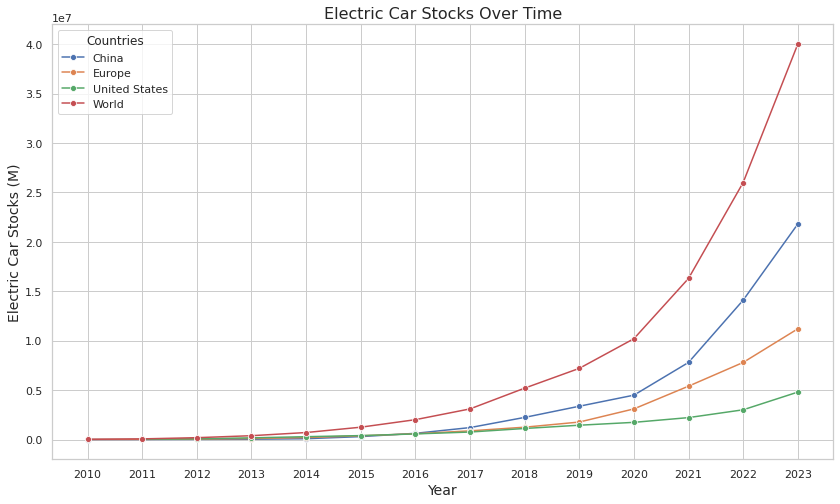

In [61]:
entities_of_interest = ["World", "China", "United States", "Europe"]
filtered_df = car_in_use[car_in_use['Entity'].isin(entities_of_interest)]


# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df, x="Year", y="Electric car stocks", hue="Entity", marker='o')

# Add title and labels
plt.title("Electric Car Stocks Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electric Car Stocks (M)", fontsize=14)
plt.legend(title="Countries")
plt.xticks(range(2010, 2024))

# Show plot
plt.show()